# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [5]:
import random
N = 10000   # number of users/rounds
d = 10      # number of ads
adsSelected = []
numbersOfRewards1 = [0] * d
numbersOfRewards0 = [0] * d
totalRewards = 0
for n in range(0, N):
  ad = 0
  maxRandom = 0
  for i in range(0, d):
    randomBeta = random.betavariate(numbersOfRewards1[i]+1, numbersOfRewards0[i]+1)   # the random draw of Step 2
    if (randomBeta > maxRandom):
      maxRandom = randomBeta
      ad = i
  adsSelected.append(ad)
  reward = dataset.values[n, ad]
  if (reward == 1):
    numbersOfRewards1[ad] += 1
  else:
    numbersOfRewards0[ad] += 1
  totalRewards += 1

## Visualising the results - Histogram

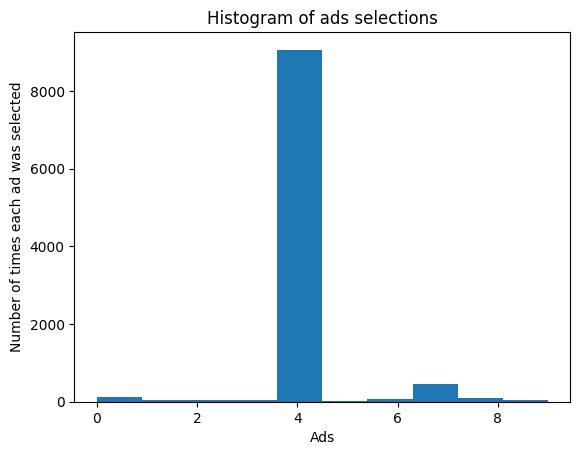

In [7]:
plt.hist(adsSelected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()